# Top Centrality Node of Each State Mapped on US Map

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Loading file
usa = gpd.read_file("C:/Users/shiva/Downloads/us-states.json")

#dictionary of states with centrality longitude and latitude values
import pandas as pd
data = pd.DataFrame({
    'State': ['VA', 'NJ', 'NC','PA',
             'WV', 'DE','SC','KY',
             'MD','GA','TX','NM',
             'AZ','CO','UT','NV',
             'CA','OH','MN','IL',
             'ME','IN','AR','MI',
             'WY','MT','WA','ND',
             'SD','ID','KS','OK',
             'MA','NH','VT','NY',
             'RI','CT','FL','AL',
             'TN','MS','LA','OR',
             'MO','IA','WI','NE'],
    'Latitude': [37.187899379041575, 40.61573620570567, 35.230027006247724,  40.33473530433413,
                38.84261829070861,39.59752551726461, 33.97892113035977,38.055782435887785,
                 39.300086503548265,32.83532156865424, 32.74336279045964, 34.63040201067034,
                33.44394813069604,39.75976396313592,40.7651376608609,41.01094376011422,
                35.37442395998955,39.973919115932965, 45.14874, 41.09890437343685,
                44.588185195388775,39.80816931839217,34.22617213787539, 42.912401812113906,
                42.65070623973284, 47.51685605663507,47.305214964049966, 48.232691002144655,
                 44.41047862759807,42.88582260952835,39.06636323853038, 34.932478326316456,
                42.26009240534051, 44.36856016468445,44.489400159135705,43.06126724037718,
                 41.70650364541197,41.3012902834612, 30.29708658338734,33.50849266205321,
                35.609592330894095,32.29747880843351,30.50697009317257,45.527466066827444,
                39.11318259690514, 42.03318037594473, 44.19797139323393,40.58565063060359],
    'Longitude': [-78.20519962822218, -74.26614998942796, -80.13704461302689,-76.90584046866033,
                 -82.13220285905633,-75.69098582787561, -81.01415067328834,-84.5108878324878,
                 -76.55334155117183,-83.6219599430873, -97.32150158788389,-106.76441219149147,
                 -112.08306749417793,-105.00003114195232, -111.90250612206991,-117.69223795974864,
                 -118.9802424141192, -82.99619351616965, -93.292232,-88.41991577448673,
                 -69.59604238926443,-86.31249506740085,-92.01802781349906,-83.98821206757569,
                 -105.16801610008267, -111.36172032102995,-122.23223357416028,-101.30490105225508,
                 -98.47862150535825,-112.47482278958245,-95.67426085139392, -95.772626375005,
                 -71.79667229023055,-71.56184369180887,-73.11437504789411,-76.1866402690414,
                 -71.44973394435075,-72.37537597941319,-81.97640803933149, -86.81456347969525,
                 -89.23098667821255,-90.19103418865677,-91.1802589795292,-122.66576053027636,
                 -94.47887270281606,-92.86064755000316,-88.4802915447324,-98.34423353885396]
})


In [22]:
from shapely.geometry import Point

# Converting DataFrame to GeoDataFrame
data['Coordinates'] = data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
points = gpd.GeoDataFrame(data, geometry='Coordinates')


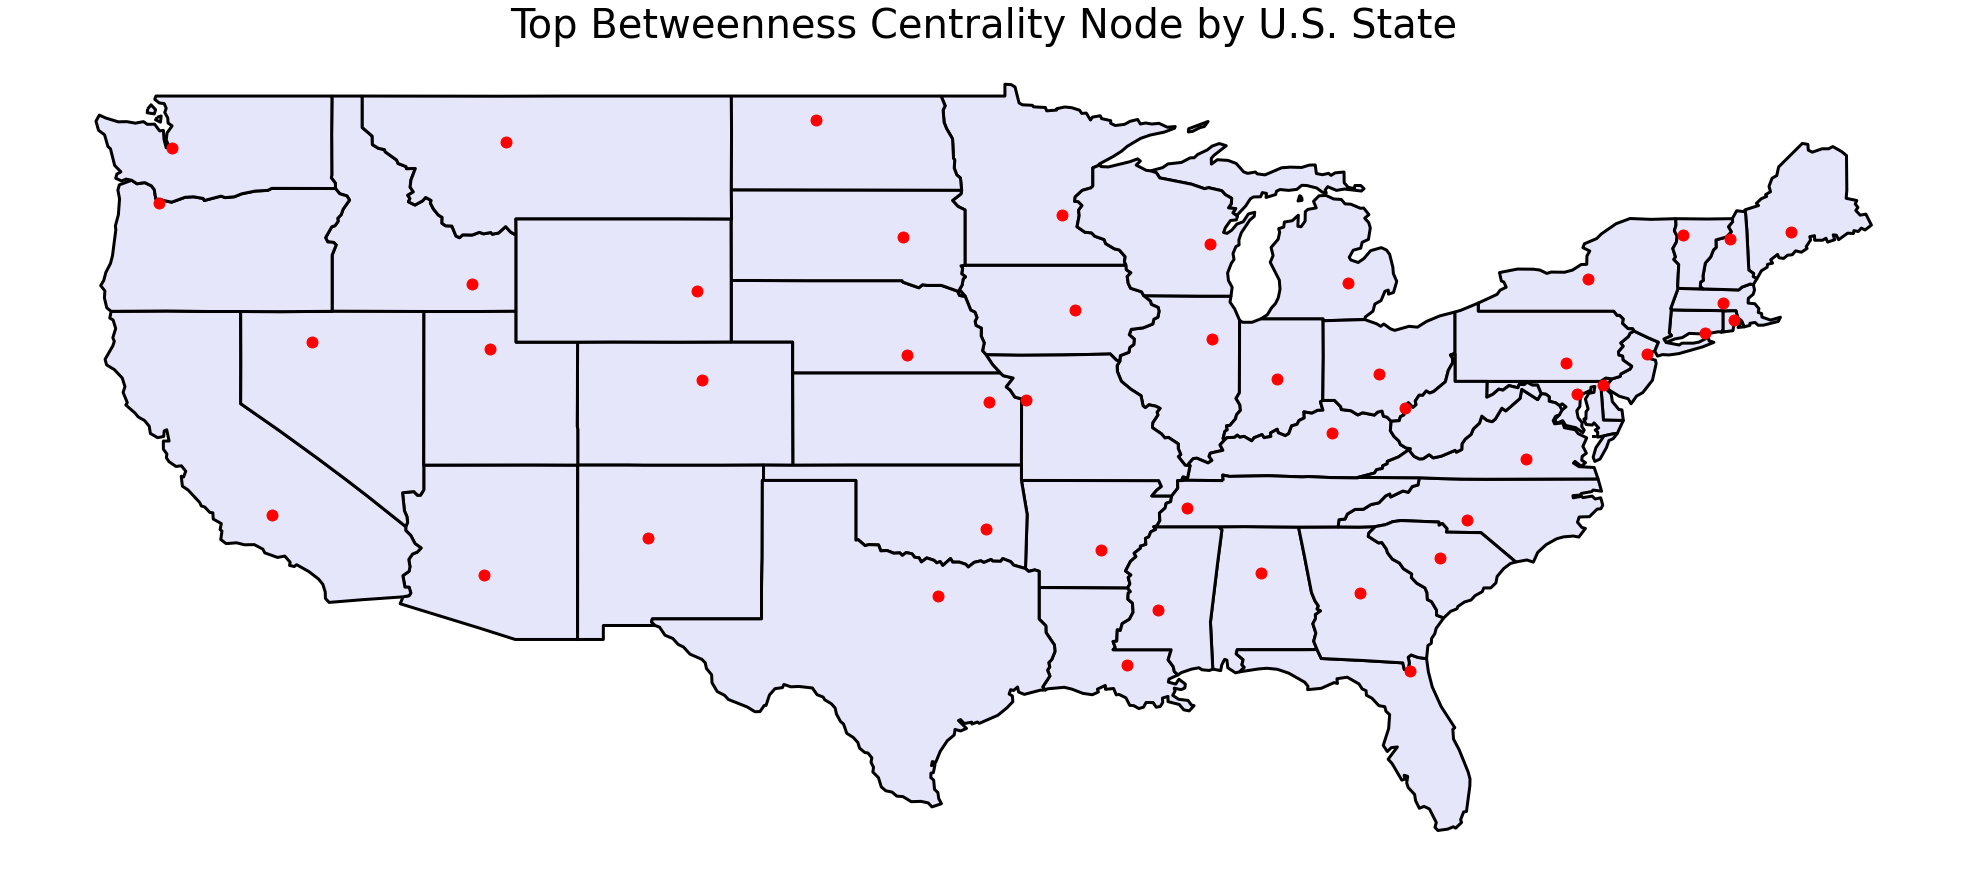

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd

usa = gpd.read_file("C:/Users/shiva/Downloads/us-states.json")


fig, ax = plt.subplots(1, 1, figsize=(35, 30))
usa.plot(ax=ax, color='lavender', edgecolor='black', linewidth=3)
# Plotting the points
points.plot(ax=ax, color='red', markersize=120)

plt.title('Top Betweenness Centrality Node by U.S. State', fontsize=40) 
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

ax.set_axis_off()



plt.show()



In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx

us_states = gpd.read_file("C:/Users/shiva/Downloads/us-states.json")
rail = gpd.read_file("C:/Users/shiva/Downloads/North_American_Rail_Network_Lines.geojson")

# DataFrame for railway density
data = {
    'State': ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 
              'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
              'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    'Railway_Density': [0.083528,   0.023490, 0.063814,  0.057727,  0.036949,  0.130482, 0.141395, 0.062672, 0.095644, 0.032159, 0.172630,  0.158678, 0.091848, 0.077115, 
                        0.088691, 0.070950, 0.049464, 0.106836,  0.140349, 0.055052,  0.073166, 0.073737,  0.081401,  0.026639, 0.059759, 0.017132, 0.067709, 0.230495,
                        0.023675, 0.093727, 0.082349, 0.060176, 0.168608, 0.059822, 0.033580, 0.161883,  0.118414, 0.091798, 0.031261, 0.090656, 0.053303, 0.031810,
                        0.070978, 0.100751,  0.076471, 0.117210, 0.070045, 0.026286]
}
df = pd.DataFrame(data)

# Mapping from IDs to state abbreviations
id_to_state = { '01': 'AL', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '12': 'FL',
    '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
    '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC',
    '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY',
    '72': 'PR' }

# Applying mapping and merging
us_states['state_abbreviation'] = us_states['id'].map(id_to_state)
merged = us_states.merge(df, left_on='state_abbreviation', right_on='State')

# Setting to Web Mercator for mapping
merged_wm = merged.to_crs(epsg=3857)
rail_wm = rail.to_crs(epsg=3857)

us_rail_wm = gpd.sjoin(rail_wm, merged_wm, how="inner", op='intersects')



C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


# Railway Density Overlaid with All Rail Lines

C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


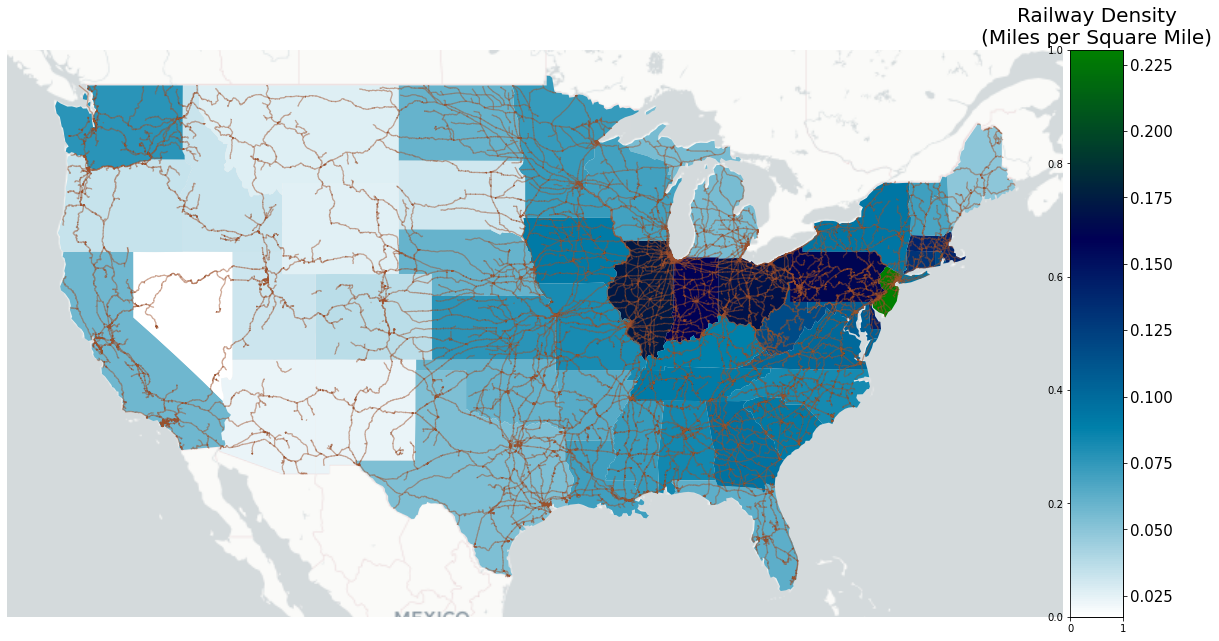

In [19]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

# Plotting the heatmap with railway density
fig, ax = plt.subplots(1, figsize=(20, 20))
merged_wm.plot(column='Railway_Density', ax=ax, cmap='ocean_r')

# Overlaying rail network lines
us_rail_wm = gpd.sjoin(rail_wm, merged_wm, how="inner", op='intersects')
us_rail_wm.plot(ax=ax, color='#A0522D', linewidth=1.25, alpha=0.5)

# Adding a basemap
cx.add_basemap(ax, crs=merged_wm.crs.to_string(), source=cx.providers.CartoDB.Positron, attribution='')

# Add title with increased font size
plt.title('Railway Density in the U.S. with Rail Network Overlay', fontsize=30)

# Remove the axes for a cleaner look
ax.set_axis_off()

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Specify the range of your colorbar
colorbar_range = [0, 0.5]  
norm = Normalize(vmin=colorbar_range[0], vmax=colorbar_range[1])


# Create colorbar as a separate figure
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='ocean_r', norm=plt.Normalize(vmin=merged_wm['Railway_Density'].min(), vmax=merged_wm['Railway_Density'].max()))
sm._A = []
fig.colorbar(sm, cax=cax, orientation='vertical')
cax.set_title('Railway Density\n(Miles per Square Mile)', fontsize=20)
#cax.title.set_position([0.5, 1.05])
cax.xaxis.label.set_size(20)
cax.tick_params(labelsize=15)


plt.show()
